# 1. 사전준비 : 패키지 다운로드

## 1.1 Tokenization 모듈 다운로드

**다음과 같은 절차를 통해 Tokenization 모듈을 다운로드합니다.**
1. jupyter notebook 창에 ntlk.downlad() 입력
2. nltk downloader 창이 뜨면 상단 메뉴에서 'Models' 선택
3. Identifier 명이 'punkt'인 항목 선택 후 다운로드

## 1.2 Stopwords 모듈 다운로드

**다음과 같은 절차를 통해 Stopwords 모듈을 다운로드합니다.**
1. nltk.download() 실행
2. corpora tab 선택
3. stopwords 선택
4. Download 버튼 클릭

**필요한 패키지 읽어드리기**

In [1]:
import pandas as pd
import numpy as np

**column 명이 name, description, category인 데이터프레임 구성**

Name : 뉴스 제목
Description : 뉴스 요약 내용
Category : 뉴스 카테고리

In [2]:
df = pd.DataFrame(columns=('name', 'description', 'category'))

# 2. 전처리

In [3]:
import nltk

In [4]:
df = pd.read_csv('bing_news_shuffle.csv', encoding='cp949')
df

,Unnamed: 0,name,description,category
0,299,'We're utterly disfranchised': Welcome to Buck...,"As the general election ploughs on, a differen...",Politics
1,505,Yann Kermorgant sends Reading to Wembley in pl...,Reading are one game away from a return to the...,Sports
2,432,Samsung Pay's finally launched in the UK to ta...,Samsung Pay has finally launched in the UK to ...,ScienceAndTechnology
3,438,Shock alien life announcement on 'second Earth',Proxima b was discovered in 2013 and it was se...,ScienceAndTechnology
4,268,Physician age and outcomes in elderly patients...,"1 Department of Health Policy and Management, ...",Health
...,...,...,...,...
776,240,Family to host black tie dinner in Northampton...,"The family of a ""gregarious"" Northampton man, ...",Health
777,466,The best Bluetooth speakers,There's a lot of choice when it comes to speak...,ScienceAndTechnology
778,573,Everton agree terms with Sandro,Everton have agreed personal terms with Malaga...,Sports
779,685,Trump asked FBI's Comey to drop Flynn inquiry ...,President Donald Trump asked FBI chief James C...,World


## 2.1 토큰 추출(Tokenization)

In [5]:
print(df.iloc[0]['description']) # 첫번째 행의 뉴스 내용 출력

As the general election ploughs on, a different type of campaign is raging in the sleepy constituency of Buckingham. In the territory, nestled between Oxford, Aylesbury and Milton Keynes, more than 75,000 voters have not been heard in Parliament since 2009.


In [6]:
tokens = nltk.word_tokenize(df.iloc[0]['description']) # 첫번째 행의 뉴스 내용에서 토큰 추출
tokens

['As',
 'the',
 'general',
 'election',
 'ploughs',
 'on',
 ',',
 'a',
 'different',
 'type',
 'of',
 'campaign',
 'is',
 'raging',
 'in',
 'the',
 'sleepy',
 'constituency',
 'of',
 'Buckingham',
 '.',
 'In',
 'the',
 'territory',
 ',',
 'nestled',
 'between',
 'Oxford',
 ',',
 'Aylesbury',
 'and',
 'Milton',
 'Keynes',
 ',',
 'more',
 'than',
 '75,000',
 'voters',
 'have',
 'not',
 'been',
 'heard',
 'in',
 'Parliament',
 'since',
 '2009',
 '.']

In [7]:
tokens = [token.lower() for token in tokens if len(token) > 1]
tokens

['as',
 'the',
 'general',
 'election',
 'ploughs',
 'on',
 'different',
 'type',
 'of',
 'campaign',
 'is',
 'raging',
 'in',
 'the',
 'sleepy',
 'constituency',
 'of',
 'buckingham',
 'in',
 'the',
 'territory',
 'nestled',
 'between',
 'oxford',
 'aylesbury',
 'and',
 'milton',
 'keynes',
 'more',
 'than',
 '75,000',
 'voters',
 'have',
 'not',
 'been',
 'heard',
 'in',
 'parliament',
 'since',
 '2009']

In [8]:
tokens_bigram = nltk.bigrams(tokens)
for token in tokens_bigram:
    print(token)

('as', 'the')
('the', 'general')
('general', 'election')
('election', 'ploughs')
('ploughs', 'on')
('on', 'different')
('different', 'type')
('type', 'of')
('of', 'campaign')
('campaign', 'is')
('is', 'raging')
('raging', 'in')
('in', 'the')
('the', 'sleepy')
('sleepy', 'constituency')
('constituency', 'of')
('of', 'buckingham')
('buckingham', 'in')
('in', 'the')
('the', 'territory')
('territory', 'nestled')
('nestled', 'between')
('between', 'oxford')
('oxford', 'aylesbury')
('aylesbury', 'and')
('and', 'milton')
('milton', 'keynes')
('keynes', 'more')
('more', 'than')
('than', '75,000')
('75,000', 'voters')
('voters', 'have')
('have', 'not')
('not', 'been')
('been', 'heard')
('heard', 'in')
('in', 'parliament')
('parliament', 'since')
('since', '2009')


In [9]:
tokens_trigram = nltk.trigrams(tokens)
for token in tokens_trigram:
    print(token)

('as', 'the', 'general')
('the', 'general', 'election')
('general', 'election', 'ploughs')
('election', 'ploughs', 'on')
('ploughs', 'on', 'different')
('on', 'different', 'type')
('different', 'type', 'of')
('type', 'of', 'campaign')
('of', 'campaign', 'is')
('campaign', 'is', 'raging')
('is', 'raging', 'in')
('raging', 'in', 'the')
('in', 'the', 'sleepy')
('the', 'sleepy', 'constituency')
('sleepy', 'constituency', 'of')
('constituency', 'of', 'buckingham')
('of', 'buckingham', 'in')
('buckingham', 'in', 'the')
('in', 'the', 'territory')
('the', 'territory', 'nestled')
('territory', 'nestled', 'between')
('nestled', 'between', 'oxford')
('between', 'oxford', 'aylesbury')
('oxford', 'aylesbury', 'and')
('aylesbury', 'and', 'milton')
('and', 'milton', 'keynes')
('milton', 'keynes', 'more')
('keynes', 'more', 'than')
('more', 'than', '75,000')
('than', '75,000', 'voters')
('75,000', 'voters', 'have')
('voters', 'have', 'not')
('have', 'not', 'been')
('not', 'been', 'heard')
('been', 'he

## 2.2 정제(Cleansing)

In [10]:
from nltk.corpus import stopwords

In [11]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
tokens_clean = [token for token in tokens if not token in stop_words]
tokens_clean

['general',
 'election',
 'ploughs',
 'different',
 'type',
 'campaign',
 'raging',
 'sleepy',
 'constituency',
 'buckingham',
 'territory',
 'nestled',
 'oxford',
 'aylesbury',
 'milton',
 'keynes',
 '75,000',
 'voters',
 'heard',
 'parliament',
 'since',
 '2009']

# 3. POS tagging

nltk.download()를 하고  
Models Menu tab 선택 -> averaged_perception_tag 선택 -> Download 버튼 클릭

In [13]:
tokens_tagged = nltk.pos_tag(tokens_clean)
print(tokens_tagged)

[('general', 'JJ'), ('election', 'NN'), ('ploughs', 'VBZ'), ('different', 'JJ'), ('type', 'NN'), ('campaign', 'NN'), ('raging', 'VBG'), ('sleepy', 'JJ'), ('constituency', 'NN'), ('buckingham', 'VBD'), ('territory', 'NN'), ('nestled', 'VBN'), ('oxford', 'JJ'), ('aylesbury', 'NN'), ('milton', 'NN'), ('keynes', 'VBZ'), ('75,000', 'CD'), ('voters', 'NNS'), ('heard', 'VBD'), ('parliament', 'NN'), ('since', 'IN'), ('2009', 'CD')]


In [14]:
tokens_noun = [word for word, pos in tokens_tagged if pos in ['NN', 'NNP']]
print(tokens_noun)

['election', 'type', 'campaign', 'constituency', 'territory', 'aylesbury', 'milton', 'parliament']


# 4. WordCloud

## Word Cloud Paackage 설치

- anaconda Prompt 창에서 python --version
- https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud 로 가서 알맞은 설치 파일 다운로드
- <예>
- cp38 : python 3.8
- win32 : 32bit
- win amd64 : 64bit
- 다운받은 파일을 Anaconda 설치폴더 (C:\Users\사용자이름\Anaconda3) 아래 저장
- Anaconda Prompt에서 위 위치로 이동
- pip install wordcloud~.whl 입력하면 설치가 됨

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [16]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='white', max_font_size=100, max_words=50, stopwords=stopwords)

In [17]:
text_data = df['description'].str.cat(sep=', ')
wordcloud = wc.generate(text_data)

(-0.5, 399.5, 199.5, -0.5)

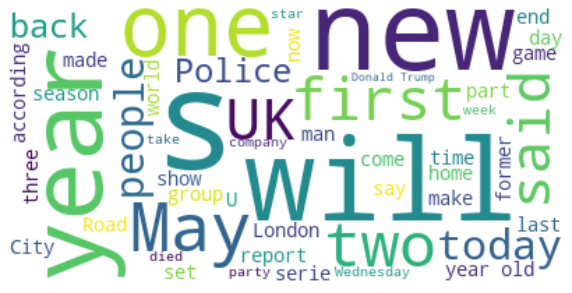

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 5. 특징값 추출

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
text_data_list = df['description'].astype(str).tolist()
text_data_arr = np.array([''.join(text) for text in text_data_list])

In [21]:
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2), strip_accents='unicode', norm='l2')
text_data = vectorizer.fit_transform(text_data_arr)

In [22]:
df_tfidf = pd.DataFrame(text_data.A, columns=vectorizer.get_feature_names())
df_tfidf

C:\Users\82104\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,000 computers,000 fans,000 loan,000 of,000 to,000 was,000 women,05,10,...,young people,youngest,youngsters,your,your vote,youtube,youtube and,yvonne,yvonne fletcher,zoe
0,0.139847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. 뉴스 분류

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [24]:
description = df['description'].astype(str).tolist()
category = df['category'].astype(str).tolist()

In [25]:
trainset_size = int(round(len(description)*0.80))

x_train = np.array([''.join(data) for data in description[0:trainset_size]])
y_train = np.array([data for data in category[0:trainset_size]])

x_test = np.array([''.join(data) for data in description[trainset_size+1:len(description)]])
y_test = np.array([data for data in category[trainset_size+1:len(category)]])

In [26]:
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [27]:
df_per = pd.DataFrame(columns=['Classifier', 'F-Measure', 'Accuracy'])
df_per

,Classifier,F-Measure,Accuracy


## 6.1 Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB().fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)

In [29]:
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pred))
print('\n Classification Report \n')
print(classification_report(y_test, nb_pred))


 Confusion Matrix 

[[10  0  1  3  5  0  1  0]
 [ 1 10  0  1  5  1  1  2]
 [ 1  1  9  3  3  0  3  0]
 [ 1  0  1  8  1  0  2  0]
 [ 3  0  0  0 12  0  1  0]
 [ 1  0  0  2  1 23  2  0]
 [ 2  0  0  1  3  0 10  0]
 [ 1  1  0  4  5  0  5  4]]

 Classification Report 

                      precision    recall  f1-score   support

            Business       0.50      0.50      0.50        20
       Entertainment       0.83      0.48      0.61        21
              Health       0.82      0.45      0.58        20
            Politics       0.36      0.62      0.46        13
ScienceAndTechnology       0.34      0.75      0.47        16
              Sports       0.96      0.79      0.87        29
                  UK       0.40      0.62      0.49        16
               World       0.67      0.20      0.31        20

            accuracy                           0.55       155
           macro avg       0.61      0.55      0.53       155
        weighted avg       0.66      0.55      0.56 

In [30]:
fm = round(f1_score(y_test, nb_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Naive Bayes', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.56,0.55


## 6.2 Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

In [32]:
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, dt_pred))
print('\n Classification Report \n')
print(classification_report(y_test, dt_pred))


 Confusion Matrix 

[[ 7  1  1  2  6  0  2  1]
 [ 1  4  2  3  6  3  0  2]
 [ 2  1  9  3  0  0  3  2]
 [ 1  0  1  6  2  1  1  1]
 [ 4  3  1  2  6  0  0  0]
 [ 1  0  1  1  5 18  1  2]
 [ 1  2  3  1  1  0  3  5]
 [ 1  1  2  3  4  1  0  8]]

 Classification Report 

                      precision    recall  f1-score   support

            Business       0.39      0.35      0.37        20
       Entertainment       0.33      0.19      0.24        21
              Health       0.45      0.45      0.45        20
            Politics       0.29      0.46      0.35        13
ScienceAndTechnology       0.20      0.38      0.26        16
              Sports       0.78      0.62      0.69        29
                  UK       0.30      0.19      0.23        16
               World       0.38      0.40      0.39        20

            accuracy                           0.39       155
           macro avg       0.39      0.38      0.37       155
        weighted avg       0.42      0.39      0.40 

In [33]:
fm = round(f1_score(y_test, dt_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, dt_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Decison Tree', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.56,0.55
1,Decison Tree,0.40,0.39


## 6.3 Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [35]:
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, rf_pred))
print('\n Classification Report \n')
print(classification_report(y_test, rf_pred))


 Confusion Matrix 

[[ 6  0  0  2  8  0  3  1]
 [ 0  4  2  3  4  4  1  3]
 [ 1  2 10  1  4  0  2  0]
 [ 1  0  2  6  2  0  2  0]
 [ 3  2  0  0 10  0  0  1]
 [ 1  1  0  0  3 23  0  1]
 [ 0  1  2  2  2  0  9  0]
 [ 1  1  3  2  6  0  3  4]]

 Classification Report 

                      precision    recall  f1-score   support

            Business       0.46      0.30      0.36        20
       Entertainment       0.36      0.19      0.25        21
              Health       0.53      0.50      0.51        20
            Politics       0.38      0.46      0.41        13
ScienceAndTechnology       0.26      0.62      0.36        16
              Sports       0.85      0.79      0.82        29
                  UK       0.45      0.56      0.50        16
               World       0.40      0.20      0.27        20

            accuracy                           0.46       155
           macro avg       0.46      0.45      0.44       155
        weighted avg       0.49      0.46      0.46 

In [36]:
fm = round(f1_score(y_test, rf_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, rf_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Random Forest', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.56,0.55
1,Decison Tree,0.40,0.39
2,Random Forest,0.46,0.46


## 6.4 Support Vector Machine

In [37]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC().fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)

In [38]:
print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, svm_pred))
print('\n Classification Report \n')
print(classification_report(y_test, svm_pred))


 Confusion Matrix 

[[10  1  1  3  3  0  1  1]
 [ 0 11  0  2  4  1  1  2]
 [ 1  1 10  3  4  0  1  0]
 [ 1  0  1  7  1  0  1  2]
 [ 3  3  1  1  7  0  1  0]
 [ 1  2  0  1  0 25  0  0]
 [ 2  1  1  1  1  0 10  0]
 [ 2  1  1  3  3  0  3  7]]

 Classification Report 

                      precision    recall  f1-score   support

            Business       0.50      0.50      0.50        20
       Entertainment       0.55      0.52      0.54        21
              Health       0.67      0.50      0.57        20
            Politics       0.33      0.54      0.41        13
ScienceAndTechnology       0.30      0.44      0.36        16
              Sports       0.96      0.86      0.91        29
                  UK       0.56      0.62      0.59        16
               World       0.58      0.35      0.44        20

            accuracy                           0.56       155
           macro avg       0.56      0.54      0.54       155
        weighted avg       0.60      0.56      0.57 

In [39]:
fm = round(f1_score(y_test, svm_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, svm_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Support Vector Machine', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.56,0.55
1,Decison Tree,0.40,0.39
2,Random Forest,0.46,0.46
3,Support Vector Machine,0.57,0.56


In [40]:
df_per_1 = df_per.set_index('Classifier')
df_per_1

,F-Measure,Accuracy
Classifier,,
Naive Bayes,0.56,0.55
Decison Tree,0.40,0.39
Random Forest,0.46,0.46
Support Vector Machine,0.57,0.56


## 성능비교

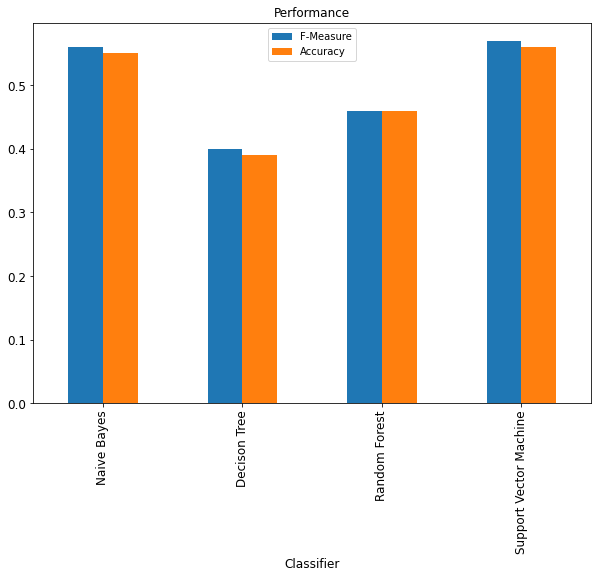

In [41]:
ax = df_per_1[['F-Measure','Accuracy']].plot(kind='bar', title ='Performance'
                                             , figsize=(10, 7), legend=True, fontsize=12)
ax.set_xlabel('Classifier', fontsize=12)
plt.show()